## Part1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pingouin as pg
import statsmodels.api as sm
from sklearn.utils import resample
from scipy import stats
import pingouin as pg
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Import dataset
data = pd.read_csv('clean_kaggle_data.csv')

The aim of the assignment is to explore the nature of women's representation in Data Science and Machine Learning and the effects of education on income level. Therefore, first, the whole clean dataset of “Kaggle ML & DS Survey Challenge.” in 2021 has been imported. The column Q25 “What is your current yearly compensation (approximate $USD)?” is the target column in this assignment. An exploratory data analysis has been presented to analyze the dataset. So, here I selected three factors: age(Q3), the years of programming experience(Q6) and which industry is the participants current employed(Q20) to explore the relationships between these characteristics with the target column (Q25) and visualized the relationship in boxplot and barplots.

### Age vs Salary

In [3]:
# Select Age and Salary, present the descriptive data
df_age = data[['Q1','Q25']] # Select Age and Salary from the origin dataset
df_age = df_age.sort_values(by="Q1")# Sort with ascending order of ages
df_age.rename(columns={'Q1':'Age Groups','Q25':'Salary'}, inplace=True)
round(df_age.groupby('Age Groups').describe(),2) # Descriptive data, rounded with two decimal places

Salary                                                            \
             count       mean        std     min      25%      50%       75%   
Age Groups                                                                     
18-21        931.0   15722.88   86677.40  1000.0   1000.0   1000.0    3000.0   
22-24       2092.0   19918.74   81903.86  1000.0   1000.0   3000.0   15000.0   
25-29       3235.0   29213.91   68629.91  1000.0   2000.0  10000.0   40000.0   
30-34       2626.0   47932.03   84957.88  1000.0   3000.0  25000.0   70000.0   
35-39       1992.0   59316.27  103367.66  1000.0   4000.0  25000.0   80000.0   
40-44       1528.0   67760.80  109596.66  1000.0   7500.0  40000.0   90000.0   
45-49       1141.0   82403.59  121998.82  1000.0  15000.0  50000.0  100000.0   
50-54        791.0   82304.68  112676.46  1000.0  10000.0  50000.0  125000.0   
55-59        504.0   97216.27  140218.95  1000.0  15000.0  60000.0  125000.0   
60-69        454.0   87435.02  103111.08  1000.0  10000.0  60000.0  125000.0   
70+           97.0  100469.07  161287.15  1000.0   2000.0  50000.0  125000.0   

                       
                  max  
Age Groups             
18-21       1000000.0  
22-24       1000000.0  
25-29       1000000.0  
30-34       1000000.0  
35-39       1000000.0  
40-44       1000000.0  
45-49       1000000.0  
50-54       1000000.0  
55-59       1000000.0  
60-69       1000000.0  
70+         1000000.0

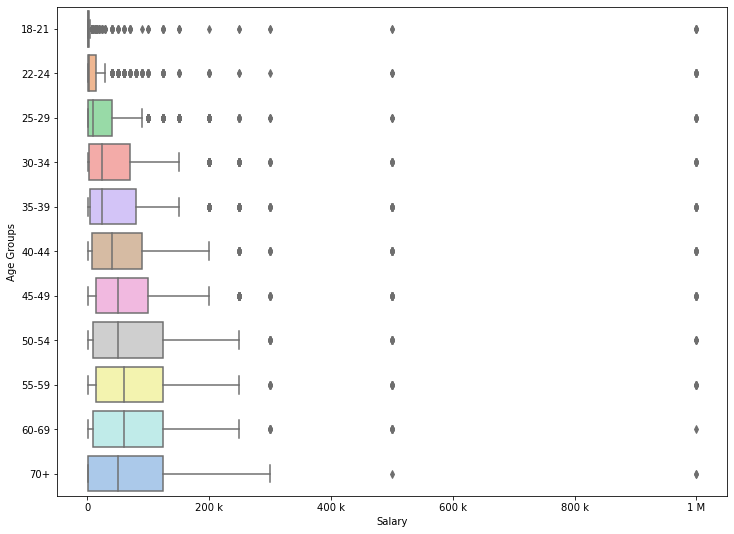

In [4]:
# Plot a boxplot to show the relationship between age and income level
fig,ax=plt.subplots(figsize=(12,9))
sns.boxplot(ax=ax, data=df_age,x='Salary', y='Age Groups',palette="pastel")
ax.xaxis.set_major_formatter(ticker.EngFormatter()) # Format y-axis
plt.savefig('Figure 1: Age vs Salary.png')
plt.show()

### Programming Experience vs Salary

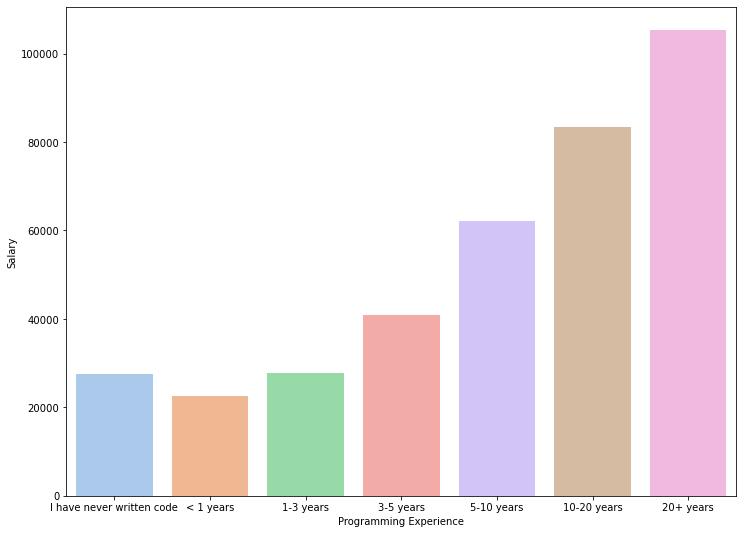

In [5]:
# Select Programming Experience and Salary, Plot a barplot of average salary
Programming_Exp = ['I have never written code','< 1 years','1-3 years','3-5 years',
                   '5-10 years','10-20 years','20+ years']
df = data[['Q6','Q25']]
salary_mean = df.groupby('Q6').mean()
salary_mean.reset_index(level=0,inplace=True)
salary_mean.rename(columns={'Q6':'Programming Experience','Q25':'Salary'}, inplace=True)
salary_mean = salary_mean.reindex([6,5,0,3,4,1,2]) # Reindex the rows
# Plot the barplot
fig,ax=plt.subplots(figsize=(12,9))
sns.barplot(ax=ax, data=salary_mean, x='Programming Experience',y='Salary',palette="pastel")
plt.savefig('Figure 2: Programming Experience vs Salary.png')
plt.show()

In [6]:
# Print mean salary of different experience level
print(round(salary_mean,2))

      Programming Experience     Salary
6  I have never written code   27651.40
5                  < 1 years   22604.14
0                  1-3 years   27763.89
3                  3-5 years   40831.37
4                 5-10 years   62156.72
1                10-20 years   83355.90
2                  20+ years  105358.68


### Industry of Current Employer vs Salary

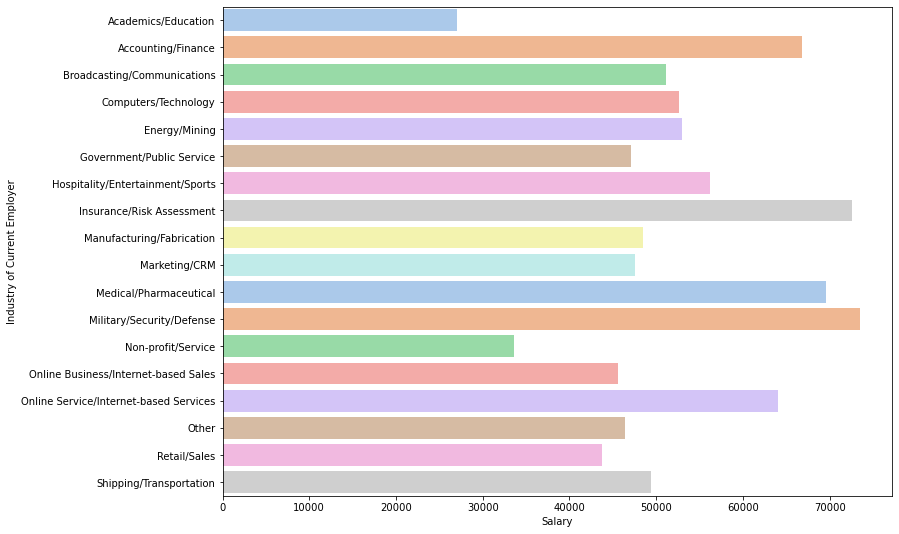

              Industry of Current Employer    Salary
0                      Academics/Education  27003.51
1                       Accounting/Finance  66753.43
2              Broadcasting/Communications  51079.94
3                     Computers/Technology  52603.24
4                            Energy/Mining  52928.71
5                Government/Public Service  47073.68
6         Hospitality/Entertainment/Sports  56149.39
7                Insurance/Risk Assessment  72529.34
8                Manufacturing/Fabrication  48511.93
9                            Marketing/CRM  47544.03
10                  Medical/Pharmaceutical  69558.11
11               Military/Security/Defense  73528.80
12                      Non-profit/Service  33642.60
13    Online Business/Internet-based Sales  45589.15
14  Online Service/Internet-based Services  64057.25
15                                   Other  46449.81
16                            Retail/Sales  43751.95
17                 Shipping/Transportation  49

In [7]:
# Select Industry of Current Employer and Salary
df_ind = data[['Q20','Q25']]
df_ind  = df_ind.groupby('Q20').mean()
df_ind.reset_index(level=0,inplace=True)
df_ind.rename(columns={'Q20':'Industry of Current Employer','Q25':'Salary'}, inplace=True)
# Plot barplot
fig,ax=plt.subplots(figsize=(12,9))
sns.barplot(ax=ax, data=df_ind, y='Industry of Current Employer',x='Salary',palette="pastel") # Plot Barplot
plt.savefig('Figure 3: Industry of Current Employer vs Salary.png')
plt.show()
print(round(df_ind,2)) # Print Average salary

## Part 2

In [8]:
# Select Men and Women, drop missing values and produce descriptive data
data_men = data[data['Q2']=='Man']
data_women = data[data['Q2']=='Woman']
data_men = data_men[['Q2','Q25']]
data_women = data_women[['Q2','Q25']]
# Rename columns
data_men.rename(columns={'Q2':'Gender','Q25':'Salary'}, inplace=True)
data_women.rename(columns={'Q2':'Gender','Q25':'Salary'}, inplace=True)
# Drop missing values
data_men = data_men.dropna()
data_women = data_women.dropna()
# Combine the dataframe and print descriptive statistics
df_wm= pd.concat([data_women, data_men])
df_wm.groupby('Gender').describe()

Salary                                                                \
          count          mean           std     min     25%      50%      75%   
Gender                                                                          
Man     12642.0  51193.600696  99979.274378  1000.0  2000.0  20000.0  60000.0   
Woman    2482.0  34816.881547  72017.347888  1000.0  1000.0   7500.0  50000.0   

                   
              max  
Gender             
Man     1000000.0  
Woman   1000000.0

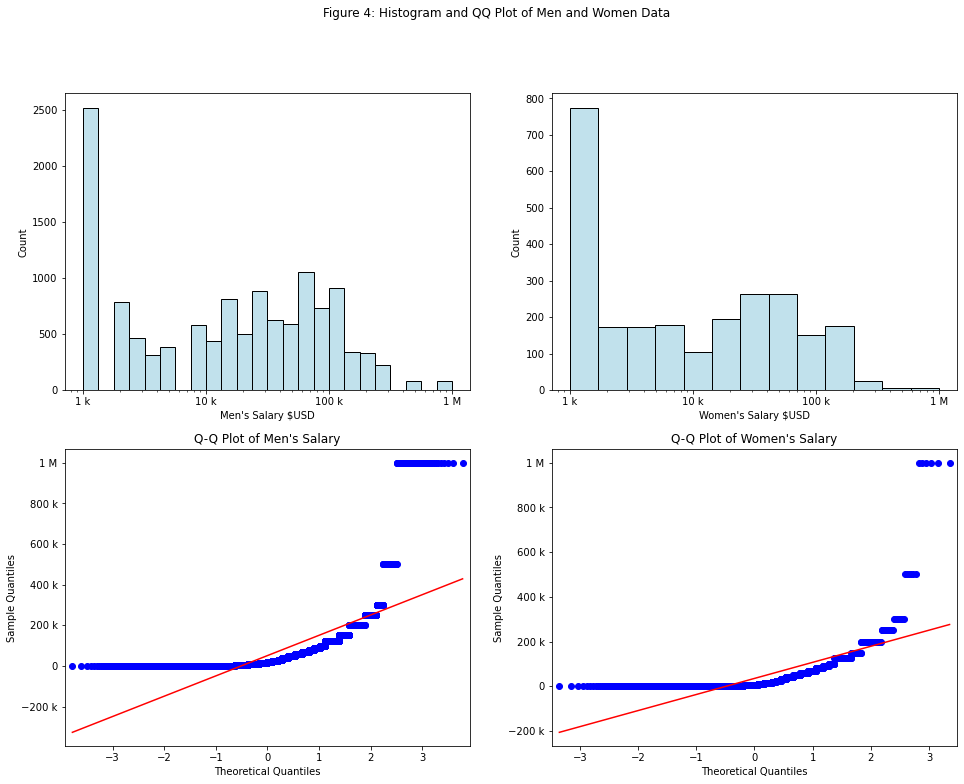

In [9]:
# Test the t-test assumption
# Normality Tests (Histogram & QQ Plot)
# Turn dataframe to numpy for QQ plot
men=data_men['Salary'].to_numpy()
women=data_women['Salary'].to_numpy()
# Plotting
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(16,12))
# Taking a log scale to have a wider bin 
sns.histplot(ax=ax[0,0],data=data_men,x='Salary',log_scale=True,color='lightblue')
ax[0,0].xaxis.set_major_formatter(ticker.EngFormatter())
ax[0,0].set_xlabel("Men's Salary $USD")
sns.histplot(ax=ax[0,1],data=data_women,x='Salary',log_scale=True,color='lightblue')
ax[0,1].xaxis.set_major_formatter(ticker.EngFormatter())
ax[0,1].set_xlabel("Women's Salary $USD")
# QQ Plots
sm.qqplot(men,line='s',ax=ax[1,0])
ax[1,0].yaxis.set_major_formatter(ticker.EngFormatter())
ax[1,0].set_title("Q-Q Plot of Men's Salary")
sm.qqplot(women,line='s',ax=ax[1,1])
ax[1,1].yaxis.set_major_formatter(ticker.EngFormatter())
ax[1,1].set_title("Q-Q Plot of Women's Salary")
fig.suptitle('Figure 4: Histogram and QQ Plot of Men and Women Data')
plt.savefig('Figure 4: Histogram and QQ Plot of Men and Women Data.png')
plt.show()

In [10]:
# Bootstrap the data
bootstrap_women = []
bootstrap_men = []
difference = []
for i in range(1000):
    # Resample with the length of the dataset
    temp_sample1 = np.random.choice(women, replace=True, size=len(women))
    sample_mean1 = np.mean(temp_sample1)
    bootstrap_women.append(sample_mean1)
    temp_sample2 = np.random.choice(men, replace=True, size=len(men))
    sample_mean2 = np.mean(temp_sample2)
    bootstrap_men.append(sample_mean2)
    # Difference
    difference.append(sample_mean2-sample_mean1)
    
bootstrap_gender = pd.DataFrame({'Men':bootstrap_men,'Women':bootstrap_women})

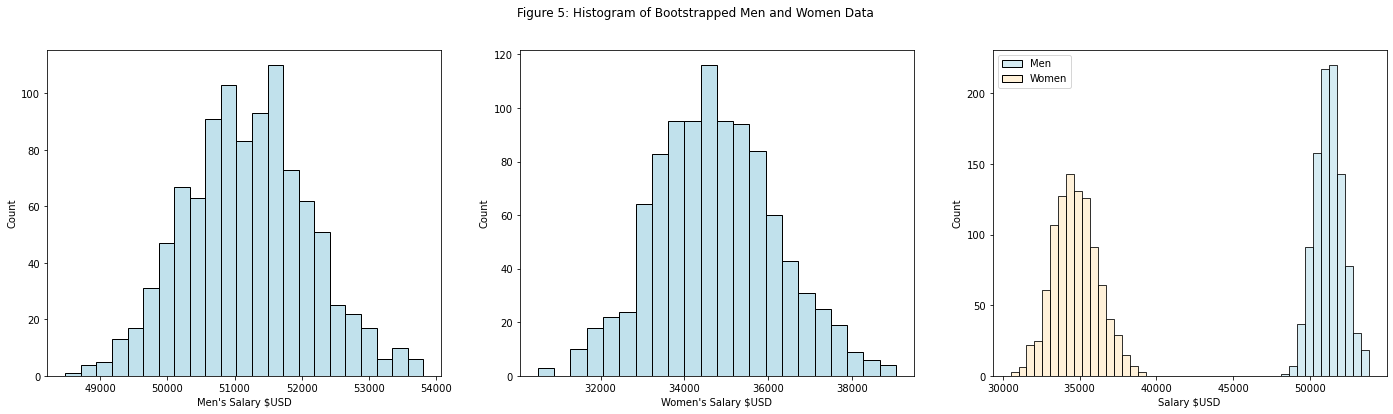

In [26]:
# Plot distribution
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(24,6))
# Histograms
sns.histplot(ax=ax[0],data=bootstrap_men,color='lightblue')
ax[0].set_xlabel("Men's Salary $USD")
sns.histplot(ax=ax[1],data=bootstrap_women,color='lightblue')
ax[1].set_xlabel("Women's Salary $USD")
# Plot two groups in one to compare
sns.histplot(ax=ax[2],data=bootstrap_gender,bins=45,palette=['lightblue','moccasin'])
ax[2].set_xlabel("Salary $USD")
fig.suptitle('Figure 5: Histogram of Bootstrapped Men and Women Data')
plt.savefig('Figure 5: Histogram of Bootstrapped Men and Women Data.png')
plt.show()

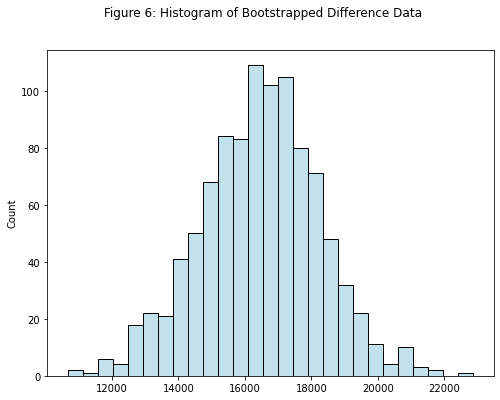

In [12]:
# Plot the difference histogram
fig,ax=plt.subplots(figsize=(8,6))
sns.histplot(ax=ax,data=difference,color='lightblue')
fig.suptitle('Figure 6: Histogram of Bootstrapped Difference Data')
plt.savefig('Figure 6: Histogram of Bootstrapped Difference Data.png')
plt.show()

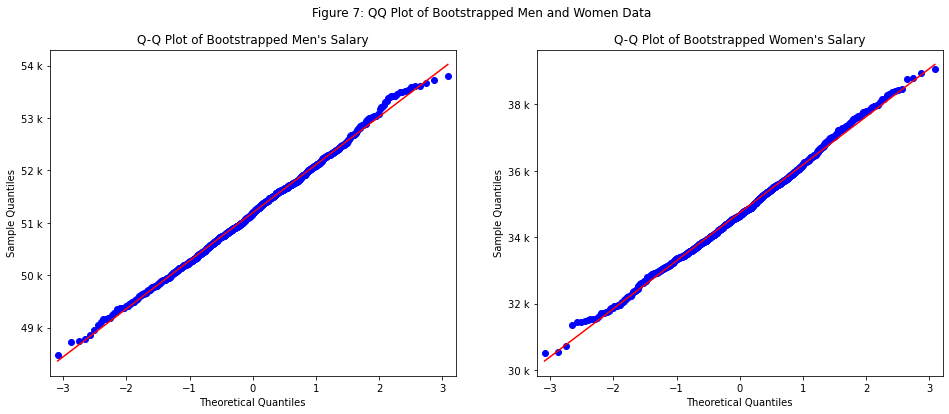

In [13]:
# QQ Plots to test normality
bootstrap_men = np.array(bootstrap_men)
bootstrap_women = np.array(bootstrap_women)
# QQ plots
fig,ax=plt.subplots(ncols=2,figsize=(16,6))
sm.qqplot(bootstrap_men,line='s',ax=ax[0])
ax[0].yaxis.set_major_formatter(ticker.EngFormatter())
ax[0].set_title("Q-Q Plot of Bootstrapped Men's Salary")
sm.qqplot(bootstrap_women,line='s',ax=ax[1])
ax[1].yaxis.set_major_formatter(ticker.EngFormatter())
ax[1].set_title("Q-Q Plot of Bootstrapped Women's Salary")
fig.suptitle('Figure 7: QQ Plot of Bootstrapped Men and Women Data')
plt.savefig('Figure 7: QQ Plot of Bootstrapped Men and Women Data.png')
plt.show()

In [14]:
# Print Variance
print("The variance of women's salary is", bootstrap_women.var(),
      "; the variance of men's salary is ", bootstrap_men.var(),'.')

The variance of women's salary is 2084690.1518734652 ; the variance of men's salary is  837874.4263647342 .


In [15]:
# Perform Welch's t-test and results
test_statisitc, p_value = stats.ttest_ind(bootstrap_men, bootstrap_women, equal_var = False)
print ("t-test: t = %f  p = %f" % (test_statisitc, p_value))

t-test: t = 304.203194  p = 0.000000


## Part 3

In [16]:
# Select variable and descriptive statistics
df_edu = data[['Q4','Q25']]
df_edu.rename(columns={'Q4':'Education','Q25':'Salary'},inplace=True)
# Dropping missing values
df_edu = df_edu.dropna()
# Select bachelor mastet and doctoral
edu_bachelor = df_edu.loc[df_edu['Education']=='Bachelor’s degree']
edu_master = df_edu.loc[df_edu['Education']=='Master’s degree']
edu_doctoral = df_edu.loc[df_edu['Education']=='Doctoral degree']
# Combine and produce descriptive statistics
df_edu= pd.concat([edu_bachelor, edu_master, edu_doctoral])
df_edu.groupby('Education').describe()

Salary                                               \
                    count          mean            std     min     25%   
Education                                                                
Bachelor’s degree  4777.0  35578.291815   89382.060777  1000.0  1000.0   
Doctoral degree    2217.0  70641.181777  117160.947589  1000.0  4000.0   
Master’s degree    6799.0  52706.868657   90928.786678  1000.0  3000.0   

                                                
                       50%      75%        max  
Education                                       
Bachelor’s degree   7500.0  40000.0  1000000.0  
Doctoral degree    40000.0  90000.0  1000000.0  
Master’s degree    25000.0  70000.0  1000000.0

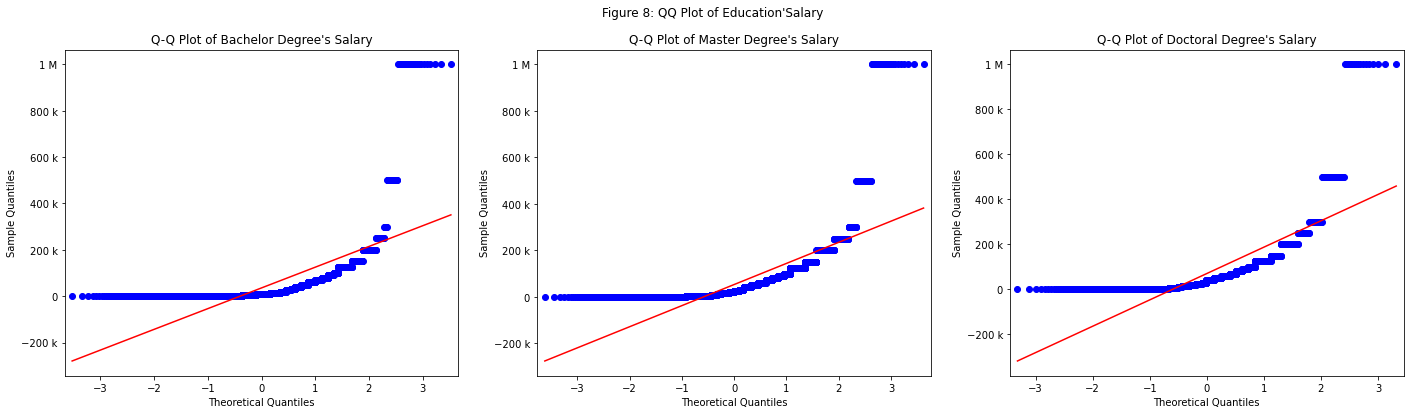

In [17]:
# Test normality: QQ plots
b_salary = edu_bachelor['Salary'].to_numpy()
m_salary = edu_master['Salary'].to_numpy()
d_salary = edu_doctoral['Salary'].to_numpy()
fig,ax=plt.subplots(ncols=3,figsize=(24,6))
sm.qqplot(b_salary,line='s',ax=ax[0])
ax[0].yaxis.set_major_formatter(ticker.EngFormatter())
ax[0].set_title("Q-Q Plot of Bachelor Degree's Salary")
sm.qqplot(m_salary,line='s',ax=ax[1])
ax[1].yaxis.set_major_formatter(ticker.EngFormatter())
ax[1].set_title("Q-Q Plot of Master Degree's Salary")
sm.qqplot(d_salary,line='s',ax=ax[2])
ax[2].yaxis.set_major_formatter(ticker.EngFormatter())
ax[2].set_title("Q-Q Plot of Doctoral Degree's Salary")
fig.suptitle("Figure 8: QQ Plot of Education'Salary")
plt.savefig("Figure 8: QQ Plot of Education'Salary.png")
plt.show()

In [20]:
# Bootstrap
bootstrap_b =[]
bootstrap_m =[]
bootstrap_d =[]
difference_mb =[]
difference_db =[]
difference_dm =[]
for i in range(1000):
    # Bootstrapped resampling
    temp_sample_b = np.random.choice(b_salary, replace=True, size=len(b_salary))
    sample_mean_b = np.mean(temp_sample_b)
    bootstrap_b.append(sample_mean_b)
    temp_sample_m = np.random.choice(m_salary, replace=True, size=len(m_salary))
    sample_mean_m = np.mean(temp_sample_m)
    bootstrap_m.append(sample_mean_m)
    temp_sample_d = np.random.choice(d_salary, replace=True, size=len(d_salary))
    sample_mean_d = np.mean(temp_sample_d)
    bootstrap_d.append(sample_mean_d)
    # Difference between each two groups
    difference_mb.append(sample_mean_m-sample_mean_b)
    difference_db.append(sample_mean_d-sample_mean_b)
    difference_dm.append(sample_mean_d-sample_mean_m)
bootstrap_edu = pd.DataFrame({'Bachelor Degree':bootstrap_b,'Master Degree':bootstrap_m,'Doctoral Degree':bootstrap_d})

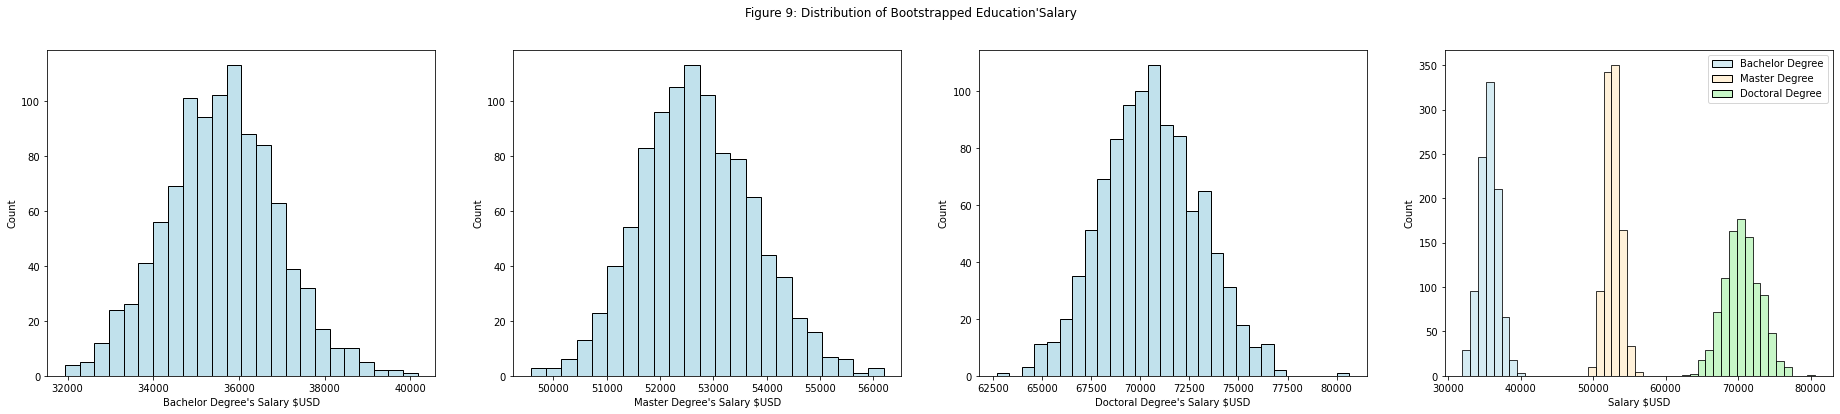

In [27]:
# Plot distribution bootstrapped
fig,ax = plt.subplots(nrows=1,ncols=4,figsize=(32,6))
sns.histplot(ax=ax[0],data=bootstrap_b,color='lightblue')
ax[0].set_xlabel("Bachelor Degree's Salary $USD")
sns.histplot(ax=ax[1],data=bootstrap_m,color='lightblue')
ax[1].set_xlabel("Master Degree's Salary $USD")
sns.histplot(ax=ax[2],data=bootstrap_d,color='lightblue')
ax[2].set_xlabel("Doctoral Degree's Salary $USD")
# Plot three groups in one to compare
sns.histplot(ax=ax[3],data=bootstrap_edu,bins=45,palette=['lightblue','moccasin','lightgreen'])
ax[3].set_xlabel("Salary $USD")
fig.suptitle("Figure 9: Distribution of Bootstrapped Education'Salary")
plt.savefig("Figure 9: Distribution of Bootstrapped Education'Salary.png")
plt.show()

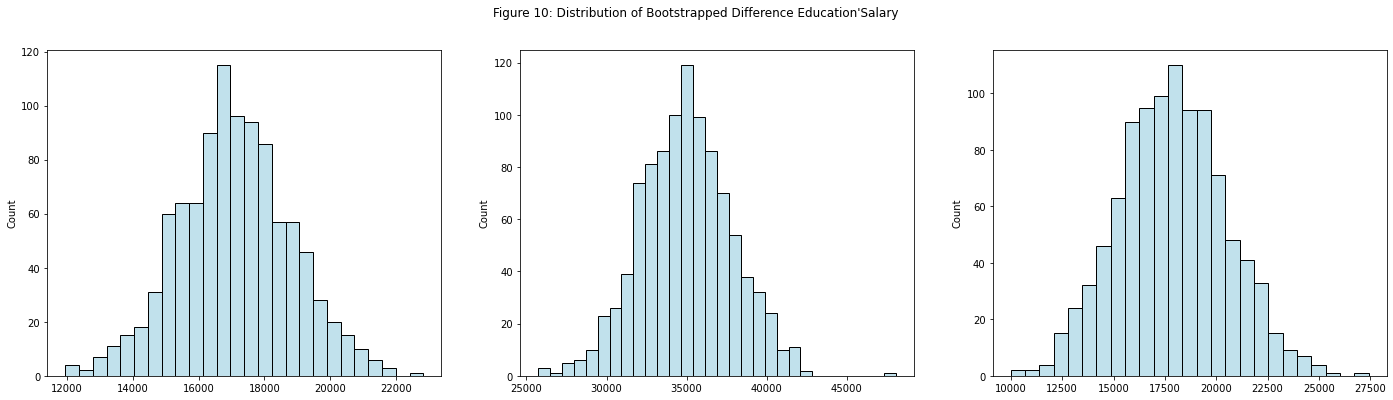

In [22]:
# Distribution of Bootstrapped Difference
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(24,6))
sns.histplot(ax=ax[0],data=difference_mb,color='lightblue')
sns.histplot(ax=ax[1],data=difference_db,color='lightblue')
sns.histplot(ax=ax[2],data=difference_dm,color='lightblue')
fig.suptitle("Figure 10: Distribution of Bootstrapped Difference Education'Salary")
plt.savefig("Figure 10: Distribution of Bootstrapped Difference Education'Salary.png")
plt.show()

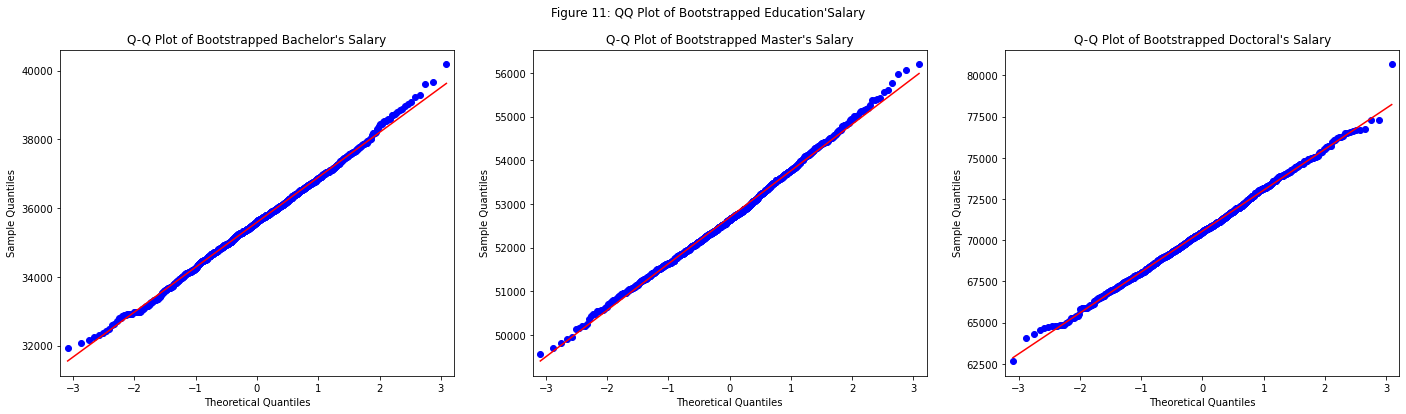

In [23]:
# QQ Plot of bootstrapped data
bootstrap_b = np.array(bootstrap_b)
bootstrap_m = np.array(bootstrap_m)
bootstrap_d = np.array(bootstrap_d)
fig,ax=plt.subplots(ncols=3,figsize=(24,6))
sm.qqplot(bootstrap_b,line='s',ax=ax[0])
ax[0].set_title("Q-Q Plot of Bootstrapped Bachelor's Salary")
sm.qqplot(bootstrap_m,line='s',ax=ax[1])
ax[1].set_title("Q-Q Plot of Bootstrapped Master's Salary")
sm.qqplot(bootstrap_d,line='s',ax=ax[2])
ax[2].set_title("Q-Q Plot of Bootstrapped Doctoral's Salary")
fig.suptitle("Figure 11: QQ Plot of Bootstrapped Education'Salary")
plt.savefig("Figure 11: QQ Plot of Bootstrapped Education'Salary.png")
plt.show()

In [24]:
# Print descriptive staitistics to compare variance homogeneity
bootstrap_edu.describe()

,Bachelor Degree,Master Degree,Doctoral Degree
count,1000.000000,1000.000000,1000.000000
mean,35589.945049,52697.434549,70550.370095
std,1306.221223,1064.181240,2484.010615
min,31938.664434,49577.952640,62675.687866
25%,34730.741051,51951.665686,68888.080740
50%,35609.535273,52640.277982,70485.453315
75%,36455.882353,53427.544492,72204.442941
max,40175.528574,56191.425210,80656.292287


In [25]:
# Perform One-Way ANOVA Test and Results
F, p = stats.f_oneway(bootstrap_b, bootstrap_m, bootstrap_d)
print ("ANOVA-test: F = %f  p = %f" % (F, p))

ANOVA-test: F = 101766.230552  p = 0.000000
